<h1 align=center><font size = 6>INDIA Vs COVID-19</font></h1>
<h2 align=center><font size = 6>Exploratory Data Analysis, Visualization & Prediction</font></h2>
By : <a href="https://www.blogger.com/profile/01288628031125822619" target="_blank">Neeraj Singh Rawat</a>

<img src="https://www.liveuttarakhand.com/wp-content/uploads/2020/04/af-780x470.jpg"/>

<img src="https://cdn.pixabay.com/photo/2020/03/19/04/36/covid19-4946260_960_720.jpg" width=500 height=90 />

Welcome to **2020** … it’s crazy.

Assuming that you’re quarantined right now, you probably have some extra time on your hands.

This is a perfect time to learn a new skill or do something productive.

In fact, it’s a great time to <a href="https://www.dexlabanalytics.com/" target="_blank">Master Data Science in Python</a>.

So.. Lets Start...!!!

# Table of Contents

* [Where India stands currently](#6)
* [A QUICK REVIEW OF THE PROCESS](#7)
* [Data_set Sources](#8)
* [About COVID-19 (Fig. view)](#9)
* [About SHIPS (Fig. view)](#10)
* [About Indian Status on Covid-19 (Fig. view)](#11)
* [Imported Libraries](#12)
* [Collecting Data](#13)
* [Data Inspecting](#14)
* [Preprocessing](#15)
*****************************************
*******************************************









* [Testing in India](#8)
* [Statewise Insights](#5)
* [Statewise Testing and Healthcare Insights](#6)
* [Economic Impact of COVID-19 on India](#4)
* [Prediction](#7)
     * [Growth Factor](#9)
     * [Prophet Model](#10)
     * [ARIMA (5,2,0)](#11)
     * [LightGBM](#12)
     * [Random Forest Regressor](#13)
     * [XGBoost Regressor](#14)
* [Interesting Insights from other Sources](#25)

# Where India stands currently?
__The Story of COVID-19 in India__

* The COVID-19 pandemic is the defining global health crisis of our time and the greatest global humanitarian challenge the world has faced since World War II. The virus has spread widely, and the number of cases is rising daily as governments work to slow its spread. India has moved quickly, implementing a proactive, nationwide, lockdown, with the goal of flattening the curve and using the time to plan and resource responses adequately.
* COVID19 outbreak has started a bit late in India as compared to other countries. But, it has started to pick up pace. With limited testing and not a well funded healthcare system, India is surely up for a challenge. Still the fight is on after 3 lockdowns (4th in progress, till May 31, 2020) and the virus shows no signs of slowing down.

__A QUICK REVIEW OF THE PROCESS__

Here we’ll analyze some covid19 data with Python. Specifically, we’re going to use Pandas, Numpy, matplotlib, seaborn, and possibly a little Plotly.

You’ll probably want to be familiar with all of them, but if not, that’s okay. You’ll still be able to run the code and [here](https://www.dexlabanalytics.com/blog) you can refer to some other tutorials and blogs that explain individual techniques in more depth.

That being said, you’ll be able to play with the code regardless.
But if you’re really serious about this, you’ll want to eventually [Master Data Science in Python](https://www.dexlabanalytics.com/courses/data-science-with-python-certification)

## Sources:
* __World Data__ Dataset consists of time-series data from 22 JAN 2020 to Till date (Updated on daily Basis).
> * [GitHub Repo created by Johns Hopkins University](https://github.com/CSSEGISandData/COVID-19/tree/master)
> * [Kaggle (Updated more frequently)](https://www.kaggle.com/headsortails/covid19-us-county-jhu-data-demographics)


* __Indian Data__
> * [Ministry of Health and Family Welfare, Government of India](https://www.mohfw.gov.in)
> * [INDIA Data set](https:/kaggle.com)

* __Code Help__
> * [Matplotlib plots](https://matplotlib.org/3.1.1/gallery/index.html)
> * [Plotly maps](https://plotly.com/python/)
> * [General Help](https://stackoverflow.com/)

* __Other__
> * [World Dashboard](https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6)
> * [India Dashboard](https://www.covid19india.org)
> * [Color Palettes ](https://www.color-hex.com/color-palettes/)

### COVID-19

In [ ]:
from IPython.core.display import HTML
HTML('''<div class="flourish-embed flourish-cards" data-src="visualisation/1810417" data-url="https://flo.uri.sh/visualisation/1810417/embed"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

### SHIPS

In [ ]:
#Cruise Shipes
HTML('''<div class="flourish-embed flourish-cards" data-src="visualisation/1816605" data-url="https://flo.uri.sh/visualisation/1816605/embed"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

In [ ]:
#INDIA
HTML('''<div class="flourish-embed flourish-cards" data-src="visualisation/1786965" data-url="https://flo.uri.sh/visualisation/1786965/embed"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

## Libraries

In [170]:
# Importing required Lib

# storing and anaysis
import pandas as pd
import numpy as np

import datetime
from datetime import datetime, timedelta,date

# visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import ticker
import pycountry_convert as pc
import seaborn as sns
import squarify
import plotly.offline as py
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import folium

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima_model import ARIMA
#from fbprophet import Prophet
#from fbprophet.plot import plot_plotly, add_changepoints_to_plot

# HTML embedding
import requests
import IPython
from IPython.display import Image
from IPython.display import display, HTML
from IPython.display import display_html

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# use any one from below
%matplotlib inline
#%matplotlib notebook

__GET RAW DATA__

We’re going to get the raw csv data, which is easier to retrieve.

This data comes from a github <a href="https://dsreka.blogspot.com" target="_blank">repository for Covid-19 data</a>, originaly created by <a href="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv" target="_blank">Johns Hopkins</a>.

To get the raw data, we’re going to use the Pandas read_csv function. The read_csv function does exactly what it sounds like …. it reads in csv data.

In [3]:
                                        ##############################
                                        #         World Data         #
                                        ##############################

URL1='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-02-2020.csv'

URL2='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

URL3='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

URL4='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

URL5='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv'

URL6='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_time.csv'

latest_data = pd.read_csv(URL1)  # Last Updated Data

confirmed_df = pd.read_csv(URL2) #Comfirmed Case

recovered_df = pd.read_csv(URL3) # Recoverd Case

deaths_df = pd.read_csv(URL4) # Number of Deaths

covid19_df = pd.read_csv(URL5) #Country Cases
covid19_df = covid19_df.drop(["People_Tested","People_Hospitalized","UID","ISO3","Mortality_Rate"],axis =1)

table_df = pd.read_csv(URL6,parse_dates=['Last_Update']) #Timely Cases

world_population = pd.read_csv('population_by_country_2020.csv') #World Population


                                         ##############################
                                         #          INDIA Data        #
                                         ##############################
            
URL7 = 'https://www.mohfw.gov.in/'
df_india = pd.read_html(URL7)[-1]

#india_covid_19 = pd.read_csv('covid_19_india.csv')
#india_covid_19['Date'] = pd.to_datetime(india_covid_19['Date'],dayfirst = True)

hospital_beds = pd.read_csv('HospitalBedsIndia.csv')

ICMR_details = pd.read_csv('ICMRTestingDetails.csv')
ICMR_details['DateTime'] = pd.to_datetime(ICMR_details['DateTime'],dayfirst = True)
ICMR_details = ICMR_details.dropna(subset=['TotalSamplesTested', 'TotalPositiveCases'])

ICMR_labs = pd.read_csv('ICMRTestingLabs.csv')

state_testing = pd.read_csv('StatewiseTestingDetails.csv')
state_testing['Date'] = pd.to_datetime(state_testing['Date'])

population = pd.read_csv('population_india_census2011.csv')

age_details = pd.read_csv('AgeGroupDetails.csv')

individual_details = pd.read_csv('IndividualDetails.csv')

__INSPECT__

Now, let’s just inspect a few rows of our data to check how it looks. [Dataframe Quick Overview](./2_Data_Frame_Observation.ipynb)

**NOTE:** Keep in mind that your data might look a little different. I’m retrieving this data on June 01, 2020 (12:05 am), so the dataset has records up to 05/31/20. If you run this code on a different date, your data will be more up-to-date.

### Preprocessing

In [4]:
                                        ##############################
                                        #         World Data         #
                                        ##############################

# Renaming Columns
confirmed_df = confirmed_df.rename(columns={"Province/State":"state","Country/Region": "country"})
deaths_df= deaths_df.rename(columns={"Province/State":"state","Country/Region": "country"})
covid19_df = covid19_df.rename(columns={"Country_Region": "country"})
covid19_df["Active"] = covid19_df["Confirmed"]-covid19_df["Recovered"]-covid19_df["Deaths"]
recovered_df = recovered_df.rename(columns={"Province/State":"state","Country/Region": "country"})


# Conuntry names as pycountry_convert Lib
confirmed_df.loc[confirmed_df['country'] == "US", "country"] = "USA"
deaths_df.loc[deaths_df['country'] == "US", "country"] = "USA"
covid19_df.loc[covid19_df['country'] == "US", "country"] = "USA"
table_df.loc[table_df['Country_Region'] == "US", "Country_Region"] = "USA"
recovered_df.loc[recovered_df['country'] == "US", "country"] = "USA"


confirmed_df.loc[confirmed_df['country'] == 'Korea, South', "country"] = 'South Korea'
deaths_df.loc[deaths_df['country'] == 'Korea, South', "country"] = 'South Korea'
covid19_df.loc[covid19_df['country'] == "Korea, South", "country"] = "South Korea"
table_df.loc[table_df['Country_Region'] == "Korea, South", "Country_Region"] = "South Korea"
recovered_df.loc[recovered_df['country'] == 'Korea, South', "country"] = 'South Korea'


confirmed_df.loc[confirmed_df['country'] == 'Taiwan*', "country"] = 'Taiwan'
deaths_df.loc[deaths_df['country'] == 'Taiwan*', "country"] = 'Taiwan'
covid19_df.loc[covid19_df['country'] == "Taiwan*", "country"] = "Taiwan"
table_df.loc[table_df['Country_Region'] == "Taiwan*", "Country_Region"] = "Taiwan"
recovered_df.loc[recovered_df['country'] == 'Taiwan*', "country"] = 'Taiwan'


confirmed_df.loc[confirmed_df['country'] == 'Taiwan*', "country"] = 'Taiwan'
deaths_df.loc[deaths_df['country'] == 'Taiwan*', "country"] = 'Taiwan'
covid19_df.loc[covid19_df['country'] == "Taiwan*", "country"] = "Taiwan"
table_df.loc[table_df['Country_Region'] == "Taiwan*", "Country_Region"] = "Taiwan"
recovered_df.loc[recovered_df['country'] == 'Taiwan*', "country"] = 'Taiwan'


confirmed_df.loc[confirmed_df['country'] == 'Congo (Kinshasa)', "country"] = 'Democratic Republic of the Congo'
deaths_df.loc[deaths_df['country'] == 'Congo (Kinshasa)', "country"] = 'Democratic Republic of the Congo'
covid19_df.loc[covid19_df['country'] == "Congo (Kinshasa)", "country"] = "Democratic Republic of the Congo"
table_df.loc[table_df['Country_Region'] == "Congo (Kinshasa)", "Country_Region"] = "Democratic Republic of the Congo"
recovered_df.loc[recovered_df['country'] == 'Congo (Kinshasa)', "country"] = 'Democratic Republic of the Congo'


confirmed_df.loc[confirmed_df['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
deaths_df.loc[deaths_df['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
covid19_df.loc[covid19_df['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
table_df.loc[table_df['Country_Region'] == "Cote d'Ivoire", "Country_Region"] = "Côte d'Ivoire"
recovered_df.loc[recovered_df['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"


confirmed_df.loc[confirmed_df['country'] == "Reunion", "country"] = "Réunion"
deaths_df.loc[deaths_df['country'] == "Reunion", "country"] = "Réunion"
covid19_df.loc[covid19_df['country'] == "Reunion", "country"] = "Réunion"
table_df.loc[table_df['Country_Region'] == "Reunion", "Country_Region"] = "Réunion"
recovered_df.loc[recovered_df['country'] == "Reunion", "country"] = "Réunion"


confirmed_df.loc[confirmed_df['country'] == 'Congo (Brazzaville)', "country"] = 'Republic of the Congo'
deaths_df.loc[deaths_df['country'] == 'Congo (Brazzaville)', "country"] = 'Republic of the Congo'
covid19_df.loc[covid19_df['country'] == "Congo (Brazzaville)", "country"] = "Republic of the Congo"
table_df.loc[table_df['Country_Region'] == "Congo (Brazzaville)", "Country_Region"] = "Republic of the Congo"
recovered_df.loc[recovered_df['country'] == 'Congo (Brazzaville)', "country"] = 'Republic of the Congo'


confirmed_df.loc[confirmed_df['country'] == 'Bahamas, The', "country"] = 'Bahamas'
deaths_df.loc[deaths_df['country'] == 'Bahamas, The', "country"] = 'Bahamas'
covid19_df.loc[covid19_df['country'] == "Bahamas, The", "country"] = "Bahamas"
table_df.loc[table_df['Country_Region'] == "Bahamas, The", "Country_Region"] = "Bahamas"
recovered_df.loc[recovered_df['country'] == 'Bahamas, The', "country"] = 'Bahamas'


confirmed_df.loc[confirmed_df['country'] == 'Gambia, The', "country"] = 'Gambia'
deaths_df.loc[deaths_df['country'] == 'Gambia, The', "country"] = 'Gambia'
covid19_df.loc[covid19_df['country'] == "Gambia, The", "country"] = "Gambia"
table_df.loc[table_df['Country_Region'] == "Gambia", "Country_Region"] = "Gambia"
recovered_df.loc[recovered_df['country'] == 'Gambia, The', "country"] = 'Gambia'

import pandas as pd
import numpy as np
df_india = pd.read_html('https://www.mohfw.gov.in/')[-1]
#df_india

In [5]:
df_india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 6 columns):
S. No.                        39 non-null object
Name of State / UT            41 non-null object
Active Cases*                 41 non-null object
Cured/Discharged/Migrated*    40 non-null object
Deaths**                      40 non-null object
Total Confirmed cases*        41 non-null object
dtypes: object(6)
memory usage: 2.0+ KB


In [6]:
                                         ##############################
                                         #          INDIA Data        #
                                         ##############################


# Removing Rows from tail of data which are not to be used
df_india.drop([ df_india.index[36], df_india.index[37],
               df_india.index[38], df_india.index[39],
               df_india.index[40]], inplace= True)


# Converting dtype from Object to Int64
df_india['Active Cases*'] = df_india['Active Cases*'].astype(float).astype('Int64')
df_india['Total Confirmed cases*'] = df_india['Total Confirmed cases*'].astype(float).astype('Int64')
df_india['Cured/Discharged/Migrated*'] = df_india['Cured/Discharged/Migrated*'].astype(float).astype('Int64')
df_india['Deaths**'] = df_india['Deaths**'].astype(float).astype('Int64')

# Renaming Columns
df_india.rename(columns={
                            "Active Cases*":"Active",
                            "Total Confirmed cases*":"Confirmed",
                            "Cured/Discharged/Migrated*": "Recovered",
                            "Deaths**": "Deaths"
                        }, inplace = True)

In [47]:
# CENTER ALIGNMENT FOR OUTPUT CELLS
CSS = """
.output {
    align-items: center;
}
"""

HTML('<style>{}</style>'.format(CSS))

In [ ]:
# CHECK source

# Getting all countries

countries = np.asarray(confirmed_df["country"])
countries1 = np.asarray(covid19_df["country"])

# Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defininng Function for getting continent code for country (Source: KAGGLE) // iso3166.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'

#Collecting Continent Information
confirmed_df.insert(2,"continent", [continents[country_to_continent_code(country)] for country in countries[:]])
deaths_df.insert(2,"continent",  [continents[country_to_continent_code(country)] for country in countries[:]])
covid19_df.insert(1,"continent",  [continents[country_to_continent_code(country)] for country in countries1[:]])
table_df.insert(1,"continent",  [continents[country_to_continent_code(country)] for country in table_df["Country_Region"].values])
recovered_df.insert(2,"continent",  [continents[country_to_continent_code(country)] for country in countries[:]] )

In [8]:
table_df = table_df[table_df["continent"] != "Others"]

In [9]:
# Disputed Country or Cruise ships
deaths_df[deaths_df["continent" ]== 'Others']

state             country continent        Lat        Long  1/22/20  \
88    NaN    Diamond Princess    Others   0.000000    0.000000        0   
127   NaN            Holy See    Others  41.902900   12.453400        0   
236   NaN         Timor-Leste    Others  -8.874217  125.727539        0   
240   NaN  West Bank and Gaza    Others  31.952200   35.233200        0   
246   NaN              Kosovo    Others  42.602636   20.902977        0   
247   NaN               Burma    Others  21.916200   95.956000        0   
251   NaN          MS Zaandam    Others   0.000000    0.000000        0   
260   NaN      Western Sahara    Others  24.215500  -12.885800        0   

     1/23/20  1/24/20  1/25/20  1/26/20  ...  5/23/20  5/24/20  5/25/20  \
88         0        0        0        0  ...       13       13       13   
127        0        0        0        0  ...        0        0        0   
236        0        0        0        0  ...        0        0        0   
240        0        0        0        0  ...        3        3        3   
246        0        0        0        0  ...       29       29       30   
247        0        0        0        0  ...        6        6        6   
251        0        0        0        0  ...        2        2        2   
260        0        0        0        0  ...        0        0        0   

     5/26/20  5/27/20  5/28/20  5/29/20  5/30/20  5/31/20  6/1/20  
88        13       13       13       13       13       13      13  
127        0        0        0        0        0        0       0  
236        0        0        0        0        0        0       0  
240        3        3        3        3        3        3       3  
246       30       30       30       30       30       30      30  
247        6        6        6        6        6        6       6  
251        2        2        2        2        2        2       2  
260        1        1        1        1        1        1       1  

[8 rows x 137 columns]

In [10]:
active_df = confirmed_df.copy()
active_df.iloc[:,5:] = active_df.iloc[:,5:] - recovered_df.iloc[:,5:] - deaths_df.iloc[:,5:]
active_df.head(5)

state      country continent      Lat     Long  1/22/20  1/23/20  1/24/20  \
0   NaN  Afghanistan      Asia  33.0000  65.0000      NaN      0.0      0.0   
1   NaN      Albania    Europe  41.1533  20.1683      NaN      0.0      0.0   
2   NaN      Algeria    Africa  28.0339   1.6596      NaN      0.0      0.0   
3   NaN      Andorra    Europe  42.5063   1.5218      NaN      0.0      0.0   
4   NaN       Angola    Africa -11.2027  17.8739      NaN      0.0      0.0   

   1/25/20  1/26/20  ...  5/23/20  5/24/20  5/25/20  5/26/20  5/27/20  \
0      0.0      0.0  ...   8742.0   9289.0   9857.0  10483.0  11091.0   
1      0.0      0.0  ...    175.0    177.0    177.0    193.0    205.0   
2      0.0      0.0  ...   3095.0   2922.0   3147.0   3162.0   3105.0   
3      0.0      0.0  ...     58.0     58.0     49.0     36.0     36.0   
4      0.0      0.0  ...     39.0     47.0     48.0     48.0     49.0   

   5/28/20  5/29/20  5/30/20  5/31/20   6/1/20  
0  11592.0  12154.0  12973.0  13620.0  14057.0  
1    220.0    215.0    232.0    232.0    233.0  
2   3090.0   3074.0   3072.0   2993.0   2958.0  
3     31.0     29.0     21.0     19.0     16.0  
4     52.0     59.0     62.0     64.0     64.0  

[5 rows x 137 columns]

In [11]:
confirmed_df = confirmed_df.replace(np.nan, '', regex=True)
deaths_df = deaths_df.replace(np.nan, '', regex=True)
recovered_df = recovered_df.replace(np.nan, '', regex=True)
active_df = active_df.replace(np.nan, '', regex=True)

# General Analysis of Data

In [12]:
#used in below 4 cells
countries_cases = covid19_df.copy().drop(['Lat','Long_','continent','Last_Update'],axis =1)
countries_cases.index = countries_cases["country"]
countries_cases = countries_cases.drop(['country'],axis=1)

continents_cases = covid19_df.copy().drop(['Lat','Long_','country','Last_Update'],axis =1)
continents_cases = continents_cases.groupby(["continent"]).sum()

countries_cases.fillna(0,inplace=True)
continents_cases.fillna(0,inplace=True)

## Reported Cases till Date
Total number of **Confirmed Cases, Deaths Reported, Recoveries** and **Active cases**

In [13]:
# Backup

temp_india = df_india.copy()
#temp_india.tail()

In [56]:
                            ########################################################
                            #               Getting WORLD & INDIA data             #
                            ########################################################

print('\n')
time = datetime.now() 
print('\033[1m' + 'Data is upto Date & Time', time)
print('\n')


# World

df_world = pd.DataFrame(pd.to_numeric(countries_cases.sum()),dtype=np.float64).transpose()
df_world.index = ['Total']
df_world["Mortality Rate (per 100)"] = np.round(100*df_world["Deaths"]/df_world["Confirmed"],2)
print('\033[1m' + '\033[4m'+ '\t World Total COVID-19 Cases ')
display(df_world.style.background_gradient(cmap='Wistia',axis=1).format("{:.0f}",subset=["Confirmed"]))

# India

temp_india = pd.DataFrame(temp_india.sum()).transpose()
temp_india.index = ['Total']
temp_india["Mortality Rate (per 100)"] = np.round(100*temp_india["Deaths"]/temp_india["Confirmed"],2)
print('\033[1m' + '\033[4m'+ '\n INDIA Total COVID-19 Cases ')
display(temp_india.style.background_gradient(cmap='Wistia',axis=1))



Data is upto Date & Time 2020-06-03 01:06:06.633362


	 World Total COVID-19 Cases 



 INDIA Total COVID-19 Cases 


In [66]:
# Viz. Total COVID-19 Cases (Percentage wise)

labels = ['Active', 'Recovered', 'Deaths']
labels1 = ['Active', 'Recovered', 'Deaths', 'Other Country']
world = [df_world["Active"].sum(), df_world["Recovered"].sum(), df_world["Deaths"].sum()]
india = [temp_india["Active"].sum(), temp_india["Recovered"].sum(), temp_india["Deaths"].sum()]
india_to_world =[(temp_india["Active"].sum()/df_world["Active"].sum())*100,
                 (temp_india["Recovered"].sum()/df_world["Recovered"].sum())*100,
                 (temp_india["Deaths"].sum()/df_world["Deaths"].sum())*100,
                (100-(temp_india["Confirmed"].sum()/df_world["Confirmed"].sum())*100)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=world, name="World"), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=india, name="India"), 1, 2)
fig.add_trace(go.Pie(labels=labels1, values=india_to_world, name="Indian to World"), 1, 3)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=0.5, hoverinfo="label+percent+name")

fig.update_layout(
    
    # Add annotations in the center of the donut pies.
    annotations=[
                 dict(text='Total COVID-19 Cases (Percentage wise)', x=0.5, y=1.1, font_size=22, showarrow=False),
                 dict(text='WORLD', x=0.09, y=0.5, font_size=15, showarrow=False),
                 dict(text='INDIA', x=0.5, y=0.5, font_size=15, showarrow=False),
                 dict(text='INDIAN Contribution', x=1.01, y=0.5, font_size=15, showarrow=False)
                ]
                )
fig.show()

In [53]:
# Getting continent wise data

fig =go.Figure(go.Sunburst(
    labels=["World", "Africa", "Asia", "Australia", "Europe", "North America", "South America", "Other", "India", "Other Asian Country"],
    parents=["", "World",  "World", "World", "World", "World", "World", "World", "Asia", "Asia"],
    values=[df_world["Confirmed"].sum(), continents_cases.iloc[0,0], continents_cases.iloc[1,0], continents_cases.iloc[2,0], continents_cases.iloc[3,0], continents_cases.iloc[4,0], continents_cases.iloc[6,0], continents_cases.iloc[5,0], temp_india["Confirmed"].sum(), (continents_cases.iloc[1,0]-temp_india["Confirmed"].sum())],
))
print('\033[1m' + '\033[4m'+ '\n\n Confirmed COVID-19 Cases in Continents ')
fig.update_layout(margin = dict(t=0, r=0, l=0, b=0))
fig.show()

print('\033[1m' + '\033[4m'+ ' Continent: Total COVID-19 Cases ')
continents_cases["Mortality Rate (per 100)"] = np.round(100*continents_cases["Deaths"]/continents_cases["Confirmed"],2)
display(continents_cases.style\
                            .background_gradient(cmap='CMRmap_r',subset=["Confirmed"])\
                            .background_gradient(cmap='Reds',subset=["Deaths"])\
                            .background_gradient(cmap='Greens',subset=["Recovered"])\
                            .background_gradient(cmap='Purples',subset=["Active"])\
                            .background_gradient(cmap='Pastel1_r',subset=["Incident_Rate"])\
                            .background_gradient(cmap='YlOrBr',subset=["Mortality Rate (per 100)"]))



 Confirmed COVID-19 Cases in Continents 


 Continent: Total COVID-19 Cases 


# NO USE

# Covid19 TOP to BOTTOM
# World & India

countries_cases["Mortality Rate (per 100)"] = np.round(100*countries_cases["Deaths"]/countries_cases["Confirmed"],2)
temp=countries_cases.sort_values('Confirmed', ascending= False).style\
                                                        .background_gradient(cmap='CMRmap_r',subset=["Confirmed"])\
                                                        .background_gradient(cmap='viridis_r',subset=["Deaths"])\
                                                        .background_gradient(cmap='rocket_r',subset=["Recovered"])\
                                                        .background_gradient(cmap='winter_r',subset=["Active"])\
                                                        .background_gradient(cmap='Pastel1_r',subset=["Incident_Rate"])\
                                                        .background_gradient(cmap='vlag',subset=["Mortality Rate (per 100)"])


display(temp)

In [67]:
# World V/s India (side by side)

def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

# World    
df1 = countries_cases.drop(['Incident_Rate'], axis=1)

# India
dff = df_india.drop(['S. No.'], axis=1)
df2 = dff.set_index("Name of State / UT")

print('\033[1m' + '\033[4m'+ '\t\t\t\t\t\t WORLD V/s INDIA - COVID-19 CASES \n\n\t\t\t\t Contries in World \t\t\t\t\t States in India ')

display_side_by_side(df1,df2)

						 WORLD V/s INDIA - COVID-19 CASES 

				 Contries in World 					 States in India 


Confirmed 
 Deaths 
 Recovered 
 Active 
 
 
 country 
 
 
 
 
 
 
 
 
 Australia 
 7221.0 
 102.0 
 6625.0 
 494.0 
 
 
 Austria 
 16759.0 
 669.0 
 15629.0 
 461.0 
 
 
 Canada 
 93365.0 
 7404.0 
 50105.0 
 35856.0 
 
 
 China 
 84160.0 
 4638.0 
 79400.0 
 122.0 
 
 
 Denmark 
 11934.0 
 580.0 
 10687.0 
 667.0 
 
 
 Finland 
 6887.0 
 320.0 
 5500.0 
 1067.0 
 
 
 France 
 189348.0 
 28836.0 
 68558.0 
 91954.0 
 
 
 Germany 
 183879.0 
 8563.0 
 166609.0 
 8707.0 
 
 
 Iceland 
 1806.0 
 10.0 
 1794.0 
 2.0 
 
 
 Ireland 
 25066.0 
 1658.0 
 22089.0 
 1319.0 
 
 
 Italy 
 233515.0 
 33530.0 
 160092.0 
 39893.0 
 
 
 Netherlands 
 46852.0 
 5986.0 
 180.0 
 40686.0 
 
 
 Norway 
 8452.0 
 237.0 
 7727.0 
 488.0 
 
 
 Russia 
 423186.0 
 5031.0 
 186602.0 
 231553.0 
 
 
 Sweden 
 38589.0 
 4468.0 
 0.0 
 34121.0 
 
 
 Switzerland 
 30874.0 
 1920.0 
 28500.0 
 454.0 
 
 
 United Kingdom 
 279391.0 
 39451.0 
 1221.0 
 238719.0 
 
 
 USA 
 1820523.0 
 105644.0 
 458231.0 
 1256648.0 
 
 
 Spain 
 239932.0 
 27127.0 
 150376.0 
 62429.0 
 
 
 Mexico 
 93435.0 
 10167.0 
 66965.0 
 16303.0 
 
 
 Chile 
 105158.0 
 1113.0 
 44946.0 
 59099.0 
 
 
 Brazil 
 526447.0 
 29937.0 
 211080.0 
 285430.0 
 
 
 Peru 
 170039.0 
 4634.0 
 68507.0 
 96898.0 
 
 
 Colombia 
 30593.0 
 1014.0 
 9689.0 
 19890.0 
 
 
 Japan 
 16837.0 
 902.0 
 14585.0 
 1350.0 
 
 
 Ukraine 
 24895.0 
 733.0 
 10461.0 
 13701.0 
 
 
 Afghanistan 
 16492.0 
 270.0 
 1450.0 
 14772.0 
 
 
 Albania 
 1164.0 
 33.0 
 891.0 
 240.0 
 
 
 Algeria 
 9626.0 
 667.0 
 6067.0 
 2892.0 
 
 
 Andorra 
 844.0 
 51.0 
 733.0 
 60.0 
 
 
 Angola 
 86.0 
 4.0 
 18.0 
 64.0 
 
 
 Antigua and Barbuda 
 26.0 
 3.0 
 19.0 
 4.0 
 
 
 Argentina 
 17415.0 
 560.0 
 5709.0 
 11146.0 
 
 
 Armenia 
 10009.0 
 158.0 
 3427.0 
 6424.0 
 
 
 Azerbaijan 
 5935.0 
 71.0 
 3564.0 
 2300.0 
 
 
 Bahamas 
 102.0 
 11.0 
 49.0 
 42.0 
 
 
 Bahrain 
 12229.0 
 19.0 
 7397.0 
 4813.0 
 
 
 Bangladesh 
 52445.0 
 709.0 
 11120.0 
 40616.0 
 
 
 Barbados 
 92.0 
 7.0 
 76.0 
 9.0 
 
 
 Belarus 
 44255.0 
 243.0 
 19195.0 
 24817.0 
 
 
 Belgium 
 58615.0 
 9505.0 
 15934.0 
 33176.0 
 
 
 Belize 
 18.0 
 2.0 
 16.0 
 0.0 
 
 
 Benin 
 244.0 
 3.0 
 148.0 
 93.0 
 
 
 Bhutan 
 47.0 
 0.0 
 9.0 
 38.0 
 
 
 Bolivia 
 10531.0 
 343.0 
 1137.0 
 9051.0 
 
 
 Bosnia and Herzegovina 
 2535.0 
 157.0 
 1910.0 
 468.0 
 
 
 Botswana 
 38.0 
 1.0 
 21.0 
 16.0 
 
 
 Brunei 
 141.0 
 2.0 
 138.0 
 1.0 
 
 
 Bulgaria 
 2538.0 
 144.0 
 1123.0 
 1271.0 
 
 
 Burkina Faso 
 881.0 
 53.0 
 720.0 
 108.0 
 
 
 Burma 
 232.0 
 6.0 
 143.0 
 83.0 
 
 
 Burundi 
 63.0 
 1.0 
 33.0 
 29.0 
 
 
 Cabo Verde 
 466.0 
 5.0 
 237.0 
 224.0 
 
 
 Cambodia 
 125.0 
 0.0 
 123.0 
 2.0 
 
 
 Cameroon 
 6397.0 
 199.0 
 3629.0 
 2569.0 
 
 
 Central African Republic 
 1069.0 
 4.0 
 23.0 
 1042.0 
 
 
 Chad 
 803.0 
 66.0 
 562.0 
 175.0 
 
 
 Comoros 
 132.0 
 2.0 
 27.0 
 103.0 
 
 
 Republic of the Congo 
 611.0 
 20.0 
 179.0 
 412.0 
 
 
 Democratic Republic of the Congo 
 3326.0 
 72.0 
 482.0 
 2772.0 
 
 
 Costa Rica 
 1084.0 
 10.0 
 676.0 
 398.0 
 
 
 Côte d'Ivoire 
 2951.0 
 33.0 
 1467.0 
 1451.0 
 
 
 Croatia 
 2246.0 
 103.0 
 2088.0 
 55.0 
 
 
 Cuba 
 2092.0 
 83.0 
 1827.0 
 182.0 
 
 
 Cyprus 
 952.0 
 17.0 
 790.0 
 145.0 
 
 
 Czechia 
 9334.0 
 323.0 
 6681.0 
 2330.0 
 
 
 Diamond Princess 
 712.0 
 13.0 
 651.0 
 48.0 
 
 
 Djibouti 
 3779.0 
 25.0 
 1607.0 
 2147.0 
 
 
 Dominica 
 18.0 
 0.0 
 16.0 
 2.0 
 
 
 Dominican Republic 
 17752.0 
 515.0 
 11075.0 
 6162.0 
 
 
 Ecuador 
 39994.0 
 3394.0 
 19823.0 
 16777.0 
 
 
 Egypt 
 26384.0 
 1005.0 
 6447.0 
 18932.0 
 
 
 El Salvador 
 2653.0 
 46.0 
 1116.0 
 1491.0 
 
 
 Equatorial Guinea 
 1306.0 
 12.0 
 200.0 
 1094.0 
 
 
 Eritrea 
 39.0 
 0.0 
 39.0 
 0.0 
 
 
 Estonia 
 1870.0 
 68.0 
 1632.0 
 170.0 
 
 
 Eswatini 
 293.0 
 3.0 
 194.0 
 96.0 
 
 
 Ethiopia 
 1344.0 
 14.0 
 231.0 
 1099.0 
 
 
 Fiji 
 18.0 
 0.0 
 15.0 
 3.0 
 
 
 Gab

## Countries & Indian States at Peak Levels

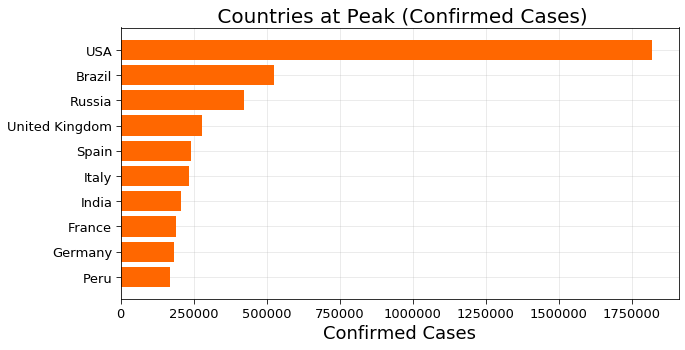

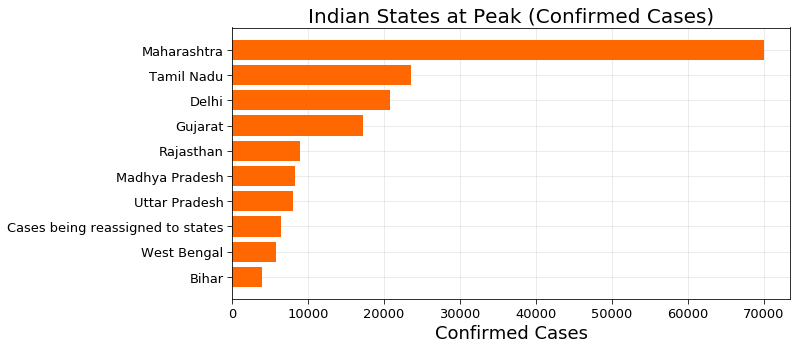

In [19]:
# Confirmed 10
                                #############################################
                                #              Confirmed Cases              #
                                #############################################

# World Confirmed
bar = plt.figure(figsize=(10,5))
bar.add_subplot(111)

plt.axes(axisbelow=True).set_facecolor("#ffffff")
plt.barh(countries_cases.sort_values('Confirmed')["Confirmed"].index[-10:], countries_cases.sort_values('Confirmed')["Confirmed"].values[-10:],color="#ff6700")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title(" Countries at Peak (Confirmed Cases)",fontsize=20)
plt.grid(b=False,alpha=0.3)

# INDIA Confirmed
bar = plt.figure(figsize=(10,5))
bar.add_subplot(111)

plt.axes(axisbelow=True).set_facecolor("#ffffff")
plt.barh(df2.sort_values('Confirmed')["Confirmed"].index[-10:], df2.sort_values('Confirmed')["Confirmed"].values[-10:],color="#ff6700")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Indian States at Peak (Confirmed Cases)",fontsize=20)
plt.grid(b=False,alpha=0.3)

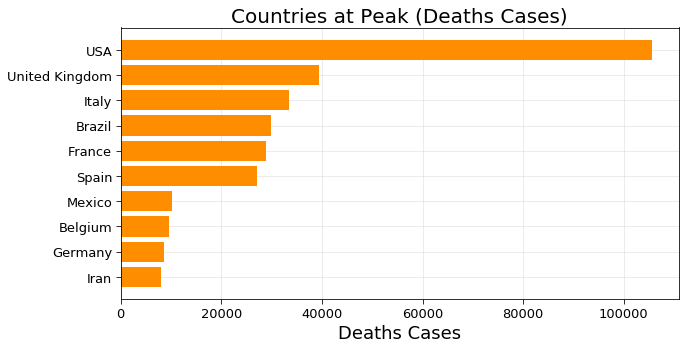

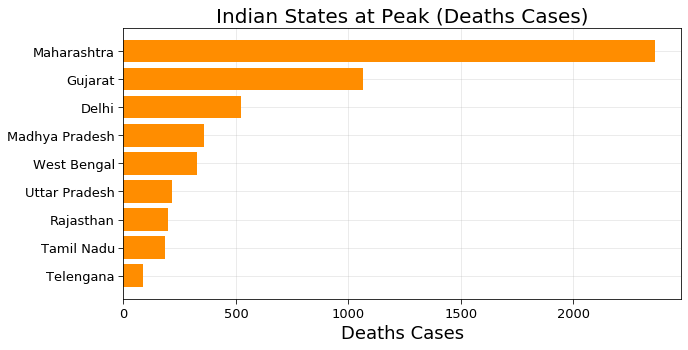

In [20]:
# Deaths 10
                                #############################################
                                #               Deaths Cases                #
                                #############################################
            
# World Deaths
bar = plt.figure(figsize=(10,5))
bar.add_subplot(111)

plt.axes(axisbelow=True).set_facecolor("#ffffff")
plt.barh(countries_cases.sort_values('Deaths')["Deaths"].index[-10:], countries_cases.sort_values('Deaths')["Deaths"].values[-10:],color="#ff8d00")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Deaths Cases",fontsize=18)
plt.title("Countries at Peak (Deaths Cases)",fontsize=20)
plt.grid(alpha=0.3,which='both')

# INDIA Deaths
bar = plt.figure(figsize=(10,5))
bar.add_subplot(111)

plt.axes(axisbelow=True).set_facecolor("#ffffff")
plt.barh(df2.sort_values('Deaths')["Deaths"].index[-10:], df2.sort_values('Deaths')["Deaths"].values[-10:],color="#ff8d00")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Deaths Cases",fontsize=18)
plt.title("Indian States at Peak (Deaths Cases)",fontsize=20)
plt.grid(alpha=0.3,which='both')

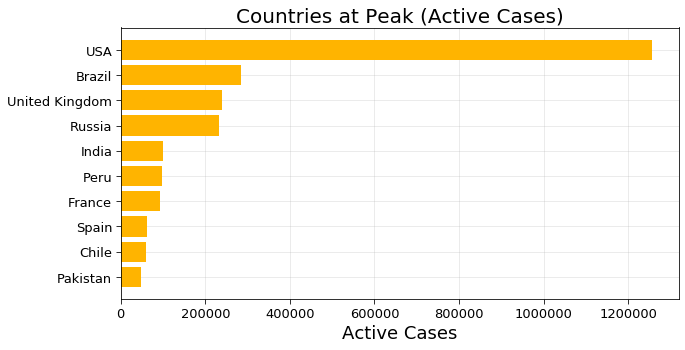

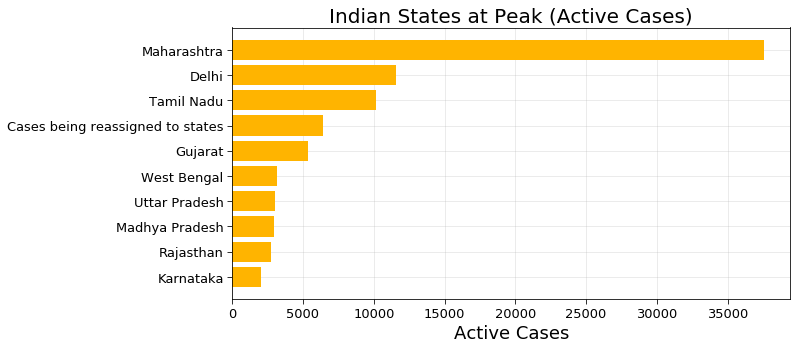

In [21]:
# Active 10
                                #############################################
                                #                Active Cases               #
                                #############################################

# Worrld Active
bar = plt.figure(figsize=(10,5))
bar.add_subplot(111)

plt.axes(axisbelow=True).set_facecolor("#ffffff")
plt.barh(countries_cases.sort_values('Active')["Active"].index[-10:],
         countries_cases.sort_values('Active')["Active"].values[-10:],color="#ffb400")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Active Cases",fontsize=18)
plt.title("Countries at Peak (Active Cases)",fontsize=20)
plt.grid(alpha=0.3,which='both')

# World India
bar = plt.figure(figsize=(10,5))
bar.add_subplot(111)

plt.axes(axisbelow=True).set_facecolor("#ffffff")
plt.barh(df2.sort_values('Active')["Active"].index[-10:], df2.sort_values('Active')["Active"].values[-10:],color="#ffb400")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Active Cases",fontsize=18)
plt.title("Indian States at Peak (Active Cases)",fontsize=20)
plt.grid(alpha=0.3,which='both')

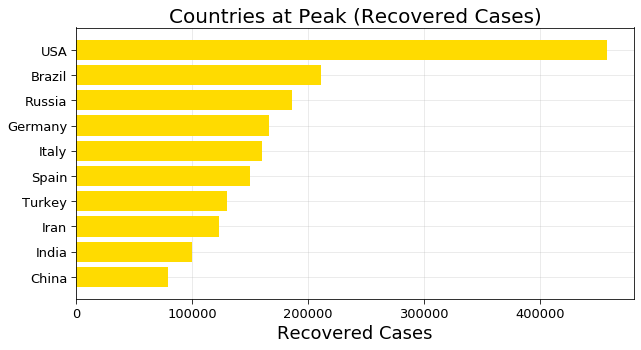

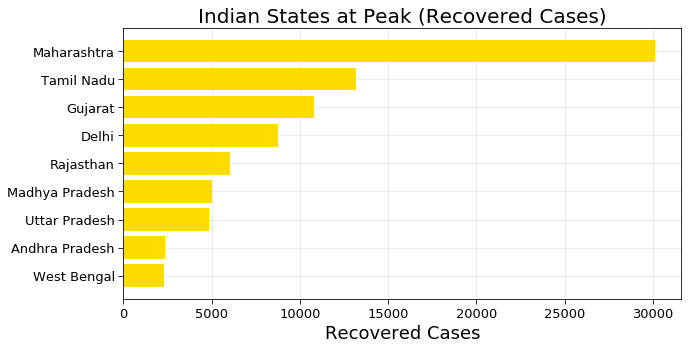

In [57]:
# Recovered 10
                                #############################################
                                #             Recovered Cases               #
                                #############################################

# World Recovered
bar = plt.figure(figsize=(10,5))
bar.add_subplot(111)

plt.axes(axisbelow=True).set_facecolor("#ffffff")
plt.barh(countries_cases.sort_values('Recovered')["Recovered"].index[-10:], countries_cases.sort_values('Recovered')["Recovered"].values[-10:],color="#ffdb00")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Recovered Cases",fontsize=18)
plt.title("Countries at Peak (Recovered Cases)",fontsize=20)
plt.grid(alpha=0.3,which='both')

# India Recovered
bar = plt.figure(figsize=(10,5))
bar.add_subplot(111)

plt.axes(axisbelow=True).set_facecolor("#ffffff")
plt.barh(df2.sort_values('Recovered')["Recovered"].index[-10:], df2.sort_values('Recovered')["Recovered"].values[-10:],color="#ffdb00")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Recovered Cases",fontsize=18)
plt.title("Indian States at Peak (Recovered Cases)",fontsize=20)
plt.grid(alpha=0.3,which='both')

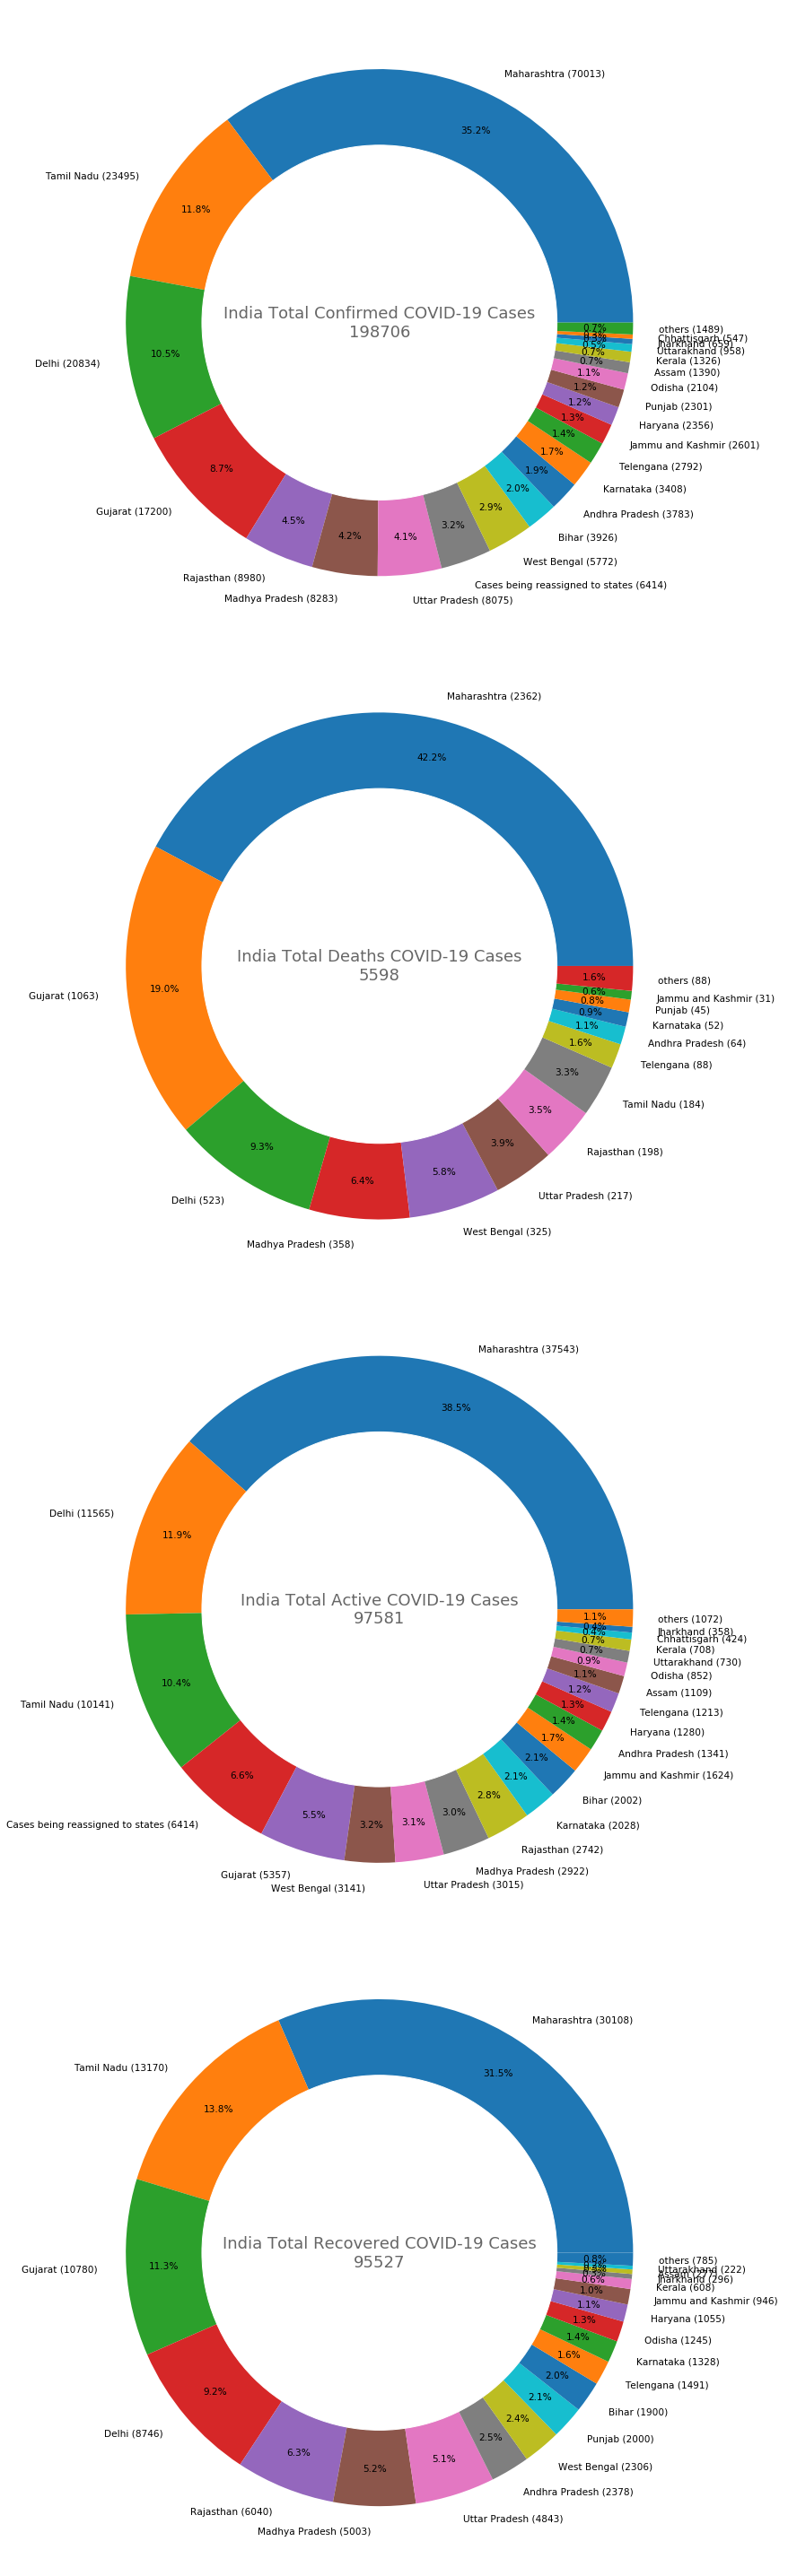

In [68]:
# India

                        ########################################################################
                        #     Indian States wise Confirmed, Deaths, Active, Recovered data     #
                        ########################################################################
    
numeric = [dff.loc[:,['Name of State / UT','Confirmed']],dff.loc[:,['Name of State / UT','Deaths']],\
           dff.loc[:,['Name of State / UT','Active']],dff.loc[:,['Name of State / UT','Recovered']]
          ]
label = ["Confirmed","Deaths","Active","Recovered"]

rows = 4
circular_plot = plt.figure(figsize=(15,10*rows))

threshold = [500,25,300,200]
for i, numeric in enumerate(numeric):
    plt.tight_layout()
    dff = numeric.groupby(["Name of State / UT"]).sum()
    dff = dff.sort_values(dff.columns[-1],ascending= False)
    others = dff[dff[dff.columns[-1]] < threshold[i]].sum()[-1]
    dff = dff[dff[dff.columns[-1]] > threshold[i]]
    dff = dff[dff.columns[-1]]
    dff["others"] = others
    labels = [dff.index[i] +" (" + str(int(dff[i])) +") "for i in range(dff.shape[0])]

    ax = circular_plot.add_subplot(rows,1,i+1)
    plt.pie(dff, labels=labels,autopct='%1.1f%%',pctdistance=0.85, labeldistance=1.1,textprops = {'fontsize':10.5})
    my_plot=plt.Circle( (0,0), 0.7, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_plot)
    plt.text(0.5,0.5,"India Total "+label[i]+ " COVID-19 Cases\n"+str(numeric.sum().values[1]), horizontalalignment='center',verticalalignment='center',transform=ax.transAxes, size=18, alpha = 0.6)

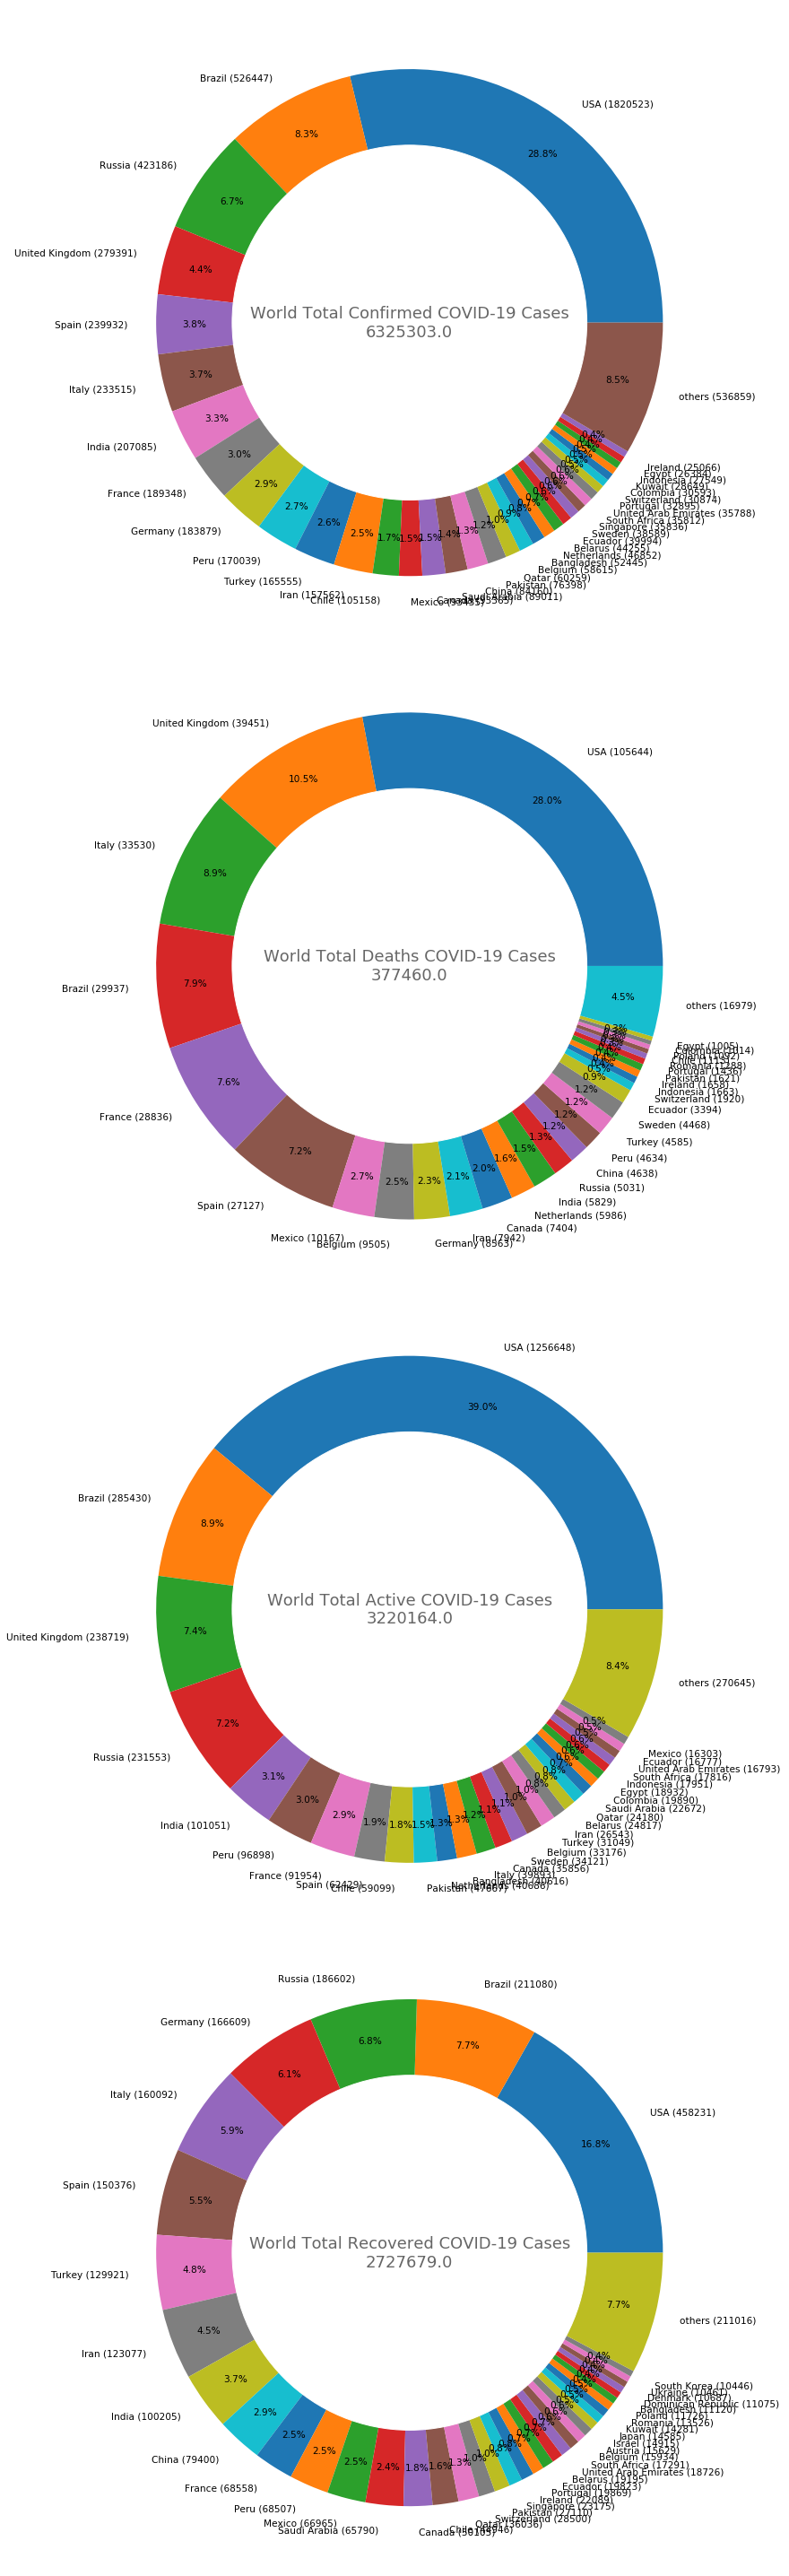

In [70]:
                        ########################################################################
                        #   Getting country wise Confirmed, Deaths, Active, Recovered data     #
                        ########################################################################
    
numeric = [covid19_df.loc[:,['country','Confirmed']],covid19_df.loc[:,['country','Deaths']],\
           covid19_df.loc[:,['country','Active']],covid19_df.loc[:,['country','Recovered']]
          ]
label = ["Confirmed","Deaths","Active","Recovered"]

rows = 4
circular_plot = plt.figure(figsize=(15,10*rows))

threshold = [25000,1000,15000,10000]
for i, numeric in enumerate(numeric):
    plt.tight_layout()
    countries_df = numeric.groupby(["country"]).sum()
    countries_df = countries_df.sort_values(countries_df.columns[-1],ascending= False)
    others = countries_df[countries_df[countries_df.columns[-1]] < threshold[i] ].sum()[-1]
    countries_df = countries_df[countries_df[countries_df.columns[-1]] > threshold[i]]
    countries_df = countries_df[countries_df.columns[-1]]
    countries_df["others"] = others
    labels = [countries_df.index[i] +" (" + str(int(countries_df[i])) +") "for i in range(countries_df.shape[0])]

    ax = circular_plot.add_subplot(rows,1,i+1)
    plt.pie(countries_df, labels=labels,autopct='%1.1f%%',pctdistance=0.85, labeldistance=1.1,textprops = {'fontsize':10.5})
    my_plot=plt.Circle( (0,0), 0.7, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_plot)
    plt.text(0.5,0.5,"World Total "+label[i]+ " COVID-19 Cases\n"+str(numeric.sum().values[1]), horizontalalignment='center',verticalalignment='center',transform=ax.transAxes, size=18, alpha = 0.6)

# Correlation Analysis
Correlation of confirmed Cases, Recovered Cases, Deaths and Active Cases.

#HIDE THIS CELL

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

print(color.BOLD + 'Hello World !' + color.END)

In [71]:
                                #############################################
                                #          Country wise Correlation         #
                                #############################################

print('\033[1m' + '\033[4m' + '\033[94m' + 'Country Wise Correlation')
display(countries_cases.iloc[:,:].corr().style.background_gradient(cmap='autumn'))

                                #############################################
                                #         Continent Wise Correlation        #
                                #############################################
print('\n\n\n')
print('\033[1m' + '\033[4m' + '\033[94m' + 'Continent Wise Correlation')
display(continents_cases.iloc[:,:].corr().style.background_gradient(cmap='autumn_r'))

                                #############################################
                                #          Indian State wise Correlation         #
                                #############################################

print('\n\n\n')
print('\033[1m' + '\033[4m' + '\033[94m' + 'Indian State Wise Correlation')
display(df_india.iloc[:,:].corr().style.background_gradient(cmap='autumn_r'))


Country Wise Correlation






Continent Wise Correlation






Indian State Wise Correlation


In [72]:
data_df = table_df.groupby(['Last_Update', 'Country_Region'])['Confirmed', 'Deaths'].max().reset_index().fillna(0)
data_df["Last_Update"] = pd.to_datetime(data_df["Last_Update"]).dt.strftime('%m/%d/%Y')

fig = px.scatter_geo(data_df, locations="Country_Region", locationmode='country names', 
                     color=np.power(data_df["Confirmed"],0.3)-2 , size= np.power(data_df["Confirmed"]+1,0.3)-1, hover_name="Country_Region",
                     hover_data=["Confirmed"],
                     range_color= [0, max(np.power(data_df["Confirmed"],0.3))], 
                     projection="natural earth", animation_frame="Last_Update", 
                     color_continuous_scale=px.colors.sequential.Plasma,
                     title='COVID-19: Progression of spread'
                    )
fig.update_coloraxes(colorscale="hot")
fig.update(layout_coloraxis_showscale=False)
fig.show()

### Age Group Analysis of India ¶

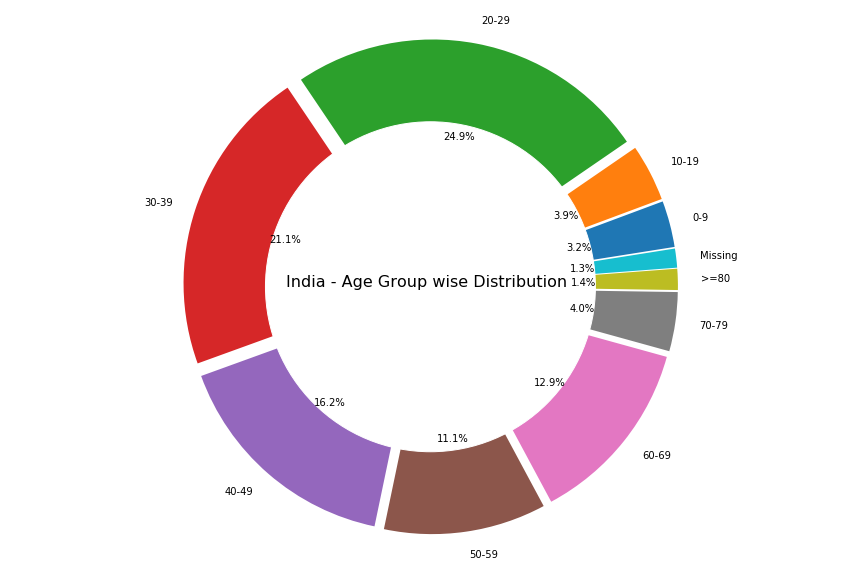

In [117]:
labels = list(age_details['AgeGroup'])
sizes = list(age_details['TotalCases'])

explode = []

for i in labels:
    explode.append(0.05)
    
plt.figure(figsize= (12,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode =explode)
centre_circle = plt.Circle((0,0), 0.7, color='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
#plt.title('India - Age Group wise Distribution',fontsize = 20)
plt.text(0.340,0.39,"India - Age Group wise Distribution", horizontalalignment='center',verticalalignment='center',transform=ax.transAxes, size=16, alpha = 1)
plt.axis('equal')  
plt.tight_layout()

* We could see that the __age group <40__ is the __most affected (approximate 46% from age group 20 to 39)__ which is against the trend which says elderly people are more at risk of being affected.
* Only __approximate 18% of people age group >60__ are affected.

#### Gender wise details

In [119]:
labels1 = ['Missing', 'Male', 'Female']
labels2 = ['Male', 'Female']

sizes1 = []
sizes1.append(individual_details['gender'].isnull().sum())
sizes1.append(list(individual_details['gender'].value_counts())[0])
sizes1.append(list(individual_details['gender'].value_counts())[1])

sizes2 = []
sizes2.append(list(individual_details['gender'].value_counts())[0])
sizes2.append(list(individual_details['gender'].value_counts())[1])

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels1, values=sizes1),1, 1)
fig.add_trace(go.Pie(labels=labels2, values=sizes2),1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.5, hoverinfo="label+percent+name")

fig.update_layout(
    
    # Add annotations in donut pies
    annotations=[#title_text
                 dict(text='Gender wise details of INDIA', x=0.5, y=1, font_size=22, showarrow=False),
                 
                 #Percentage of Gender
                 dict(text='Percentage of Gender', x=0.08, y=-0.01, font_size=15, showarrow=False),
                 
                 #Percentage of Gender (Ignoring the Missing Values)
                 dict(text='Percentage of Gender', x=0.95, y=-0.01, font_size=15, showarrow=False),
                 dict(text='(Ignoring the Missing Values)', x=0.99, y=-0.05, font_size=15, showarrow=False)])
#fig.show()

* **Approximately 80% of the patients gender information is missing.**
* **Transgender information is also not mentioned. Let's analyse with remaining data.**
* **Men are the most affected accounting to 67%. But, remember we have ~80% data missing.**

__PROJECTION IN INDIA__

In [144]:
# Getting Dates
dates = list(confirmed_df.columns[5:])
dates = list(pd.to_datetime(dates))
dates_india = dates[38:]

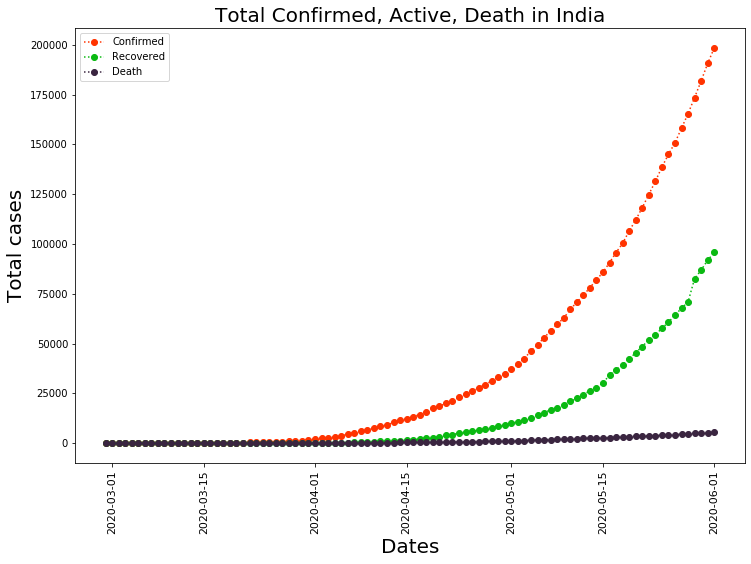

In [164]:
# Hike in Cases
df1 = confirmed_df.groupby('country').sum().reset_index()
df2 = deaths_df.groupby('country').sum().reset_index()
df3 = recovered_df.groupby('country').sum().reset_index()

k = df1[df1['country']=='India'].loc[:,'2/29/20':]
india_confirmed = k.values.tolist()[0] 

k = df2[df2['country']=='India'].loc[:,'2/29/20':]
india_deaths = k.values.tolist()[0] 

k = df3[df3['country']=='India'].loc[:,'2/29/20':]
india_recovered = k.values.tolist()[0] 

plt.figure(figsize= (12,8))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Total Confirmed, Active, Death in India" , fontsize = 20)

ax1 = plt.plot_date(y= india_confirmed,x= dates_india,label = 'Confirmed',linestyle =':',color = '#ff3300')
ax2 = plt.plot_date(y= india_recovered,x= dates_india,label = 'Recovered',linestyle =':',color = '#0ab912')
ax3 = plt.plot_date(y= india_deaths,x= dates_india,label = 'Death',linestyle =':',color = '#3a2540')
plt.legend();

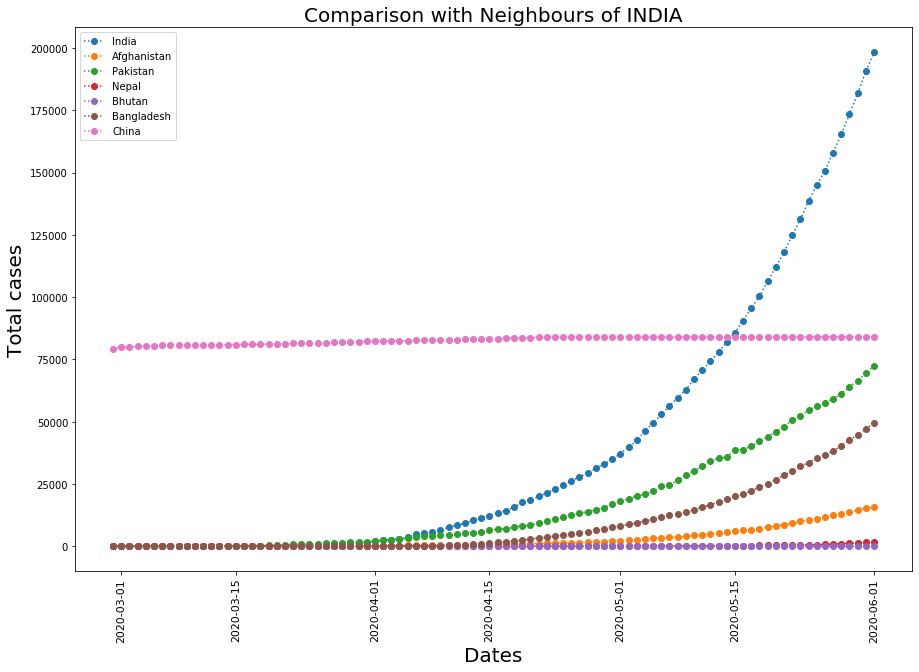

In [167]:
# Comparison with Neighbours of INDIA (From March Onwards)
countries = ['India', 'Afghanistan', 'Pakistan', 'Nepal', 'Bhutan', 'Bangladesh', 'China']

global_confirmed = []
global_recovered = []
global_deaths = []
global_active = []

for country in countries:
    k =df1[df1['country'] == country].loc[:,'2/29/20':]
    global_confirmed.append(k.values.tolist()[0]) 

    k =df2[df2['country'] == country].loc[:,'2/29/20':]
    global_deaths.append(k.values.tolist()[0]) 

    k =df3[df3['country'] == country].loc[:,'2/29/20':]
    global_deaths.append(k.values.tolist()[0])  

plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Comparison with Neighbours of INDIA" , fontsize = 20)

for i in range(len(countries)):
    plt.plot_date(y= global_confirmed[i],x= dates_india,label = countries[i],linestyle =':')
plt.legend();

__NOTE:__
* COVID-19 pandemic in Myanmar - Arrival date: March 23, 2020. [Source](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Myanmar)
* Myanmar is not listed above in neighbours of INDIA because vizualization is from 1st March.


[![Everything Is AWESOME](http://i.imgur.com/Ot5DWAW.png)](https://youtu.be/3HEiOCD6eTQ "Everything Is AWESOME")

Being highly populated the relative confimred cases of India is high compared to neighbours countries. However various action is being taken from Center to State Goverment of India to slow down the rising number of cases in India.
* Lockdown imposed by Central Goverment.
> <a href="https://www.indiatoday.in/india/story/without-lockdown-india-would-have-2-lakh-covid-19-cases-by-now-health-ministry-1665903-2020-04-11" target="_blank">Without Lockdown, 2 lakh Covid-19 cases by now:- Health ministry (April 11, 2020)</a>
* Low testing rate in India.
> <a href="https://www.bloombergquint.com/coronavirus-outbreak/indian-states-covid-19-testing-rates-lower-than-similarly-populated-countries" target="_blank">Indian States Covid-19 Testing Rates Lower Than Similarly Populated Countries</a>
<br></br>
> <a href="https://www.indiaspend.com/despite-ramping-up-testing-india-tests-least-among-worst-affected-countries/" target="_blank">Despite Ramping Up Testing, India Tests Least Among Worst Affected Countries</a>

In [178]:
# YouTube Video
HTML('''<iframe width="560" height="315" src="https://www.youtube.com/embed/3HEiOCD6eTQ" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>''')

In [177]:
# TEST
iframe = '<iframe src=' + 'https://youtu.be/3HEiOCD6eTQ' + '></iframe>'
IPython.display.HTML(iframe)

Text(0.5, 1.0, 'Total Samples Tested')

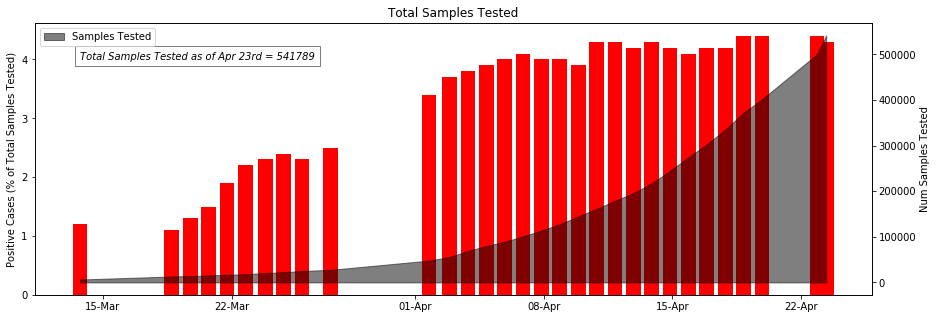

In [179]:
ICMR_details['Percent_positive'] = round((ICMR_details['TotalPositiveCases']/ICMR_details['TotalSamplesTested'])*100,1)

fig, ax1 = plt.subplots(figsize= (15,5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
ax1.set_ylabel('Positive Cases (% of Total Samples Tested)')
ax1.bar(ICMR_details['DateTime'] , ICMR_details['Percent_positive'], color="red",label = 'Percentage of Positive Cases')
ax1.text(ICMR_details['DateTime'][0],4, 'Total Samples Tested as of Apr 23rd = 541789', style='italic',fontsize= 10,
        bbox={'facecolor': 'white' ,'alpha': 0.5, 'pad': 5})

ax2 = ax1.twinx()  
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
ax2.set_ylabel('Num Samples Tested')
ax2.fill_between(ICMR_details['DateTime'],ICMR_details['TotalSamplesTested'],color = 'black',alpha = 0.5,label = 'Samples Tested');

plt.legend(loc="upper left")
plt.title('Total Samples Tested')
#plt.plot()

__Statewise Insights__

In [186]:
# TEST

all_state = list(df_india['Name of State / UT'])
#all_state.remove('Unassigned')

#latest = india_covid_19[india_covid_19['Date'] > '24-03-20']
state_cases = df_india.groupby('Name of State / UT')['Confirmed','Deaths','Recovered'].max().reset_index()

state_cases = state_cases.sort_values('Confirmed', ascending= False)
states =list(state_cases['Name of State / UT'][0:15])

states_confirmed = {}
states_deaths = {}
states_recovered = {}
states_active = {}

for state in states:
    df = df_india[df_india['Name of State / UT'] == state].reset_index()
    k = []
    l = []
    m = []
    n = []
    for i in range(1,len(df)):
        k.append(df['Confirmed'][i]-df['Confirmed'][i-1])
        l.append(df['Deaths'][i]-df['Deaths'][i-1])
        m.append(df['Recovered'][i]-df['Cured'][i-1])
        n.append(df['Active'][i]-df['Active'][i-1])
    states_confirmed[state] = k
    states_deaths[state] = l
    states_recovered[state] = m
    states_active[state] = n
    #date = list(dates_india['Date'])
    #states_dates[state] = date[1:]
    
def calc_movingaverage(values ,N):    
    cumsum, moving_aves = [0], [0,0]
    for i, x in enumerate(values, 1):
        cumsum.append(cumsum[i-1] + x)
        if i>=N:
            moving_ave = (cumsum[i] - cumsum[i-N])/N
            moving_aves.append(moving_ave)
    return moving_aves

fig = plt.figure(figsize= (25,17))
plt.suptitle('5-Day Moving Average of Confirmed Cases in Top 15 States',fontsize = 20,y=1.0)
k=0
for i in range(1,15):
    ax = fig.add_subplot(5,3,i)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    ax.bar(dates_india[states[k]],states_confirmed[states[k]],label = 'Day wise Confirmed Cases ') 
    moving_aves = calc_movingaverage(states_confirmed[states[k]],5)
    ax.plot(states_dates[states[k]][:-2],moving_aves,color='red',label = 'Moving Average',linewidth =3)  
    plt.title(states[k],fontsize = 20)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    k=k+1
plt.tight_layout(pad=3.0)

TypeError: list indices must be integers or slices, not str

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000002756C739708> (for post_execute):


ValueError: DateFormatter found a value of x=0, which is an illegal date; this usually occurs because you have not informed the axis that it is plotting dates, e.g., with ax.xaxis_date()

ValueError: DateFormatter found a value of x=0, which is an illegal date; this usually occurs because you have not informed the axis that it is plotting dates, e.g., with ax.xaxis_date()

<Figure size 1800x1224 with 1 Axes>

In [ ]:
all_state = list(india_covid_19['State/UnionTerritory'].unique())
all_state.remove('Unassigned')
#all_state.remove('Nagaland#')
#all_state.remove('Nagaland')
latest = india_covid_19[india_covid_19['Date'] > '24-03-20']
state_cases = latest.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()
latest['Active'] = latest['Confirmed'] - (latest['Deaths']- latest['Cured'])
state_cases = state_cases.sort_values('Confirmed', ascending= False).fillna(0)
states =list(state_cases['State/UnionTerritory'][0:15])

states_confirmed = {}
states_deaths = {}
states_recovered = {}
states_active = {}
states_dates = {}

for state in states:
    df = latest[latest['State/UnionTerritory'] == state].reset_index()
    k = []
    l = []
    m = []
    n = []
    for i in range(1,len(df)):
        k.append(df['Confirmed'][i]-df['Confirmed'][i-1])
        l.append(df['Deaths'][i]-df['Deaths'][i-1])
        m.append(df['Cured'][i]-df['Cured'][i-1])
        n.append(df['Active'][i]-df['Active'][i-1])
    states_confirmed[state] = k
    states_deaths[state] = l
    states_recovered[state] = m
    states_active[state] = n
    date = list(df['Date'])
    states_dates[state] = date[1:]
    
def calc_movingaverage(values ,N):    
    cumsum, moving_aves = [0], [0,0]
    for i, x in enumerate(values, 1):
        cumsum.append(cumsum[i-1] + x)
        if i>=N:
            moving_ave = (cumsum[i] - cumsum[i-N])/N
            moving_aves.append(moving_ave)
    return moving_aves

fig = plt.figure(figsize= (25,17))
plt.suptitle('5-Day Moving Average of Confirmed Cases in Top 15 States',fontsize = 20,y=1.0)
k=0
for i in range(1,15):
    ax = fig.add_subplot(5,3,i)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    ax.bar(states_dates[states[k]],states_confirmed[states[k]],label = 'Day wise Confirmed Cases ') 
    moving_aves = calc_movingaverage(states_confirmed[states[k]],5)
    ax.plot(states_dates[states[k]][:-2],moving_aves,color='red',label = 'Moving Average',linewidth =3)  
    plt.title(states[k],fontsize = 20)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    k=k+1
plt.tight_layout(pad=3.0)

__Big Increases: Rajasthan, TN, Gujarat, AP__

In [ ]:
def calc_growthRate(values):
    k = []
    for i in range(1,len(values)):
        summ = 0
        for j in range(i):
            summ = summ + values[j]
        rate = (values[i]/summ)*100
        k.append(int(rate))
    return k

fig = plt.figure(figsize= (25,17))
plt.suptitle('Growth Rate in Top 15 States',fontsize = 20,y=1.0)
k=0
for i in range(1,15):
    ax = fig.add_subplot(5,3,i)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    #ax.bar(states_dates[states[k]],states_confirmed[states[k]],label = 'Day wise Confirmed Cases ') 
    growth_rate = calc_growthRate(states_confirmed[states[k]])
    ax.plot_date(states_dates[states[k]][21:],growth_rate[20:],color='red',label = 'Growth Rate',linewidth =3,linestyle='-')  
    plt.title(states[k],fontsize = 20)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    k=k+1
plt.tight_layout(pad=3.0)

__Statewise Testing and Healthcare Insights__

In [ ]:
hospital_beds =hospital_beds.drop([36])
cols_object = list(hospital_beds.columns[2:8])

for cols in cols_object:
    hospital_beds[cols] = hospital_beds[cols].astype(int,errors = 'ignore')

In [ ]:
top_10_primary = hospital_beds.nlargest(10,'NumPrimaryHealthCenters_HMIS')
top_10_community = hospital_beds.nlargest(10,'NumCommunityHealthCenters_HMIS')
top_10_district_hospitals = hospital_beds.nlargest(10,'NumDistrictHospitals_HMIS')
top_10_public_facility = hospital_beds.nlargest(10,'TotalPublicHealthFacilities_HMIS')
top_10_public_beds = hospital_beds.nlargest(10,'NumPublicBeds_HMIS')

plt.figure(figsize=(15,10))
plt.suptitle('Top 10 States in each Health Facility',fontsize=20)
plt.subplot(221)
plt.title('Primary Health Centers')
plt.barh(top_10_primary['State/UT'],top_10_primary['NumPrimaryHealthCenters_HMIS'],color ='#87479d');

plt.subplot(222)
plt.title('Community Health Centers')
plt.barh(top_10_community['State/UT'],top_10_community['NumCommunityHealthCenters_HMIS'],color = '#9370db');

plt.subplot(224)
plt.title('Total Public Health Facilities')
plt.barh(top_10_community['State/UT'],top_10_public_facility['TotalPublicHealthFacilities_HMIS'],color='#9370db');

plt.subplot(223)
plt.title('District Hospitals')
plt.barh(top_10_community['State/UT'],top_10_district_hospitals['NumDistrictHospitals_HMIS'],color = '#87479d');

In [ ]:
top_rural_hos = hospital_beds.nlargest(10,'NumRuralHospitals_NHP18')
top_rural_beds = hospital_beds.nlargest(10,'NumRuralBeds_NHP18')
top_urban_hos = hospital_beds.nlargest(10,'NumUrbanHospitals_NHP18')
top_urban_beds = hospital_beds.nlargest(10,'NumUrbanBeds_NHP18')

plt.figure(figsize=(15,10))
plt.suptitle('Urban and Rural Health Facility',fontsize=20)
plt.subplot(221)
plt.title('Rural Hospitals')
plt.barh(top_rural_hos['State/UT'],top_rural_hos['NumRuralHospitals_NHP18'],color = '#87479d');

plt.subplot(222)
plt.title('Urban Hospitals')
plt.barh(top_urban_hos['State/UT'],top_urban_hos['NumUrbanHospitals_NHP18'],color = '#9370db');

plt.subplot(223)
plt.title('Rural Beds')
plt.barh(top_rural_beds['State/UT'],top_rural_beds['NumRuralBeds_NHP18'],color = '#87479d');

plt.subplot(224)
plt.title('Urban Beds')
plt.barh(top_urban_beds['State/UT'],top_urban_beds['NumUrbanBeds_NHP18'],color = '#9370db');

In [ ]:
state_test = pd.pivot_table(state_testing, values=['TotalSamples','Negative','Positive'], index='State', aggfunc='max')
state_names = list(state_test.index)
state_test['State'] = state_names

plt.figure(figsize=(15,10))
sns.set_color_codes("pastel")
sns.barplot(x="TotalSamples", y= state_names, data=state_test,label="Total Samples", color = '#9370db')
sns.barplot(x='Negative', y=state_names, data=state_test,label='Negative', color= '#ff9999')
sns.barplot(x='Positive', y=state_names, data=state_test,label='Positive', color='#87479d')
plt.title('Testing statewise insight',fontsize = 20)
plt.legend(ncol=2, loc="lower right", frameon=True);

In [ ]:
values = list(ICMR_labs['state'].value_counts())
names = list(ICMR_labs['state'].value_counts().index)

plt.figure(figsize=(15,10))
sns.set_color_codes("pastel")
plt.title('ICMR Testing Centers in each State', fontsize = 20)
sns.barplot(x= values, y= names,color = '#9370db');

In [ ]:
import IPython
iframe = '<iframe src=' + 'https://www.covid19india.org' + ' width=900 height=450></iframe>'
IPython.display.HTML(iframe)

In [ ]:
from IPython.core.display import HTML
HTML('''<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/1571387"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')
HTML('''<div class="flourish-embed flourish-map" data-src="story/225979"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

#[Code Soure:](https://flourish.studio/)

<h6 align=center><font size = 6>Comparison with similar Epidemics</font></h6>

**Source Link**
* [Severe acute respiratory syndrome (**SARS**)](https://www.who.int/csr/sars/country/2003_07_11/en/)
* [**EBOLA** or Ebola virus disease (**EVD**)](https://en.wikipedia.org/wiki/Ebola)
* [Middle East respiratory syndrome coronavirus (**MERS**)](https://www.who.int/emergencies/mers-cov/en/)
* [2009 swine flu (**H1N1**)](https://en.wikipedia.org/wiki/2009_swine_flu_pandemic_by_country)

In [ ]:
epidemics = pd.DataFrame({
                            'epidemic' : ['COVID-19', 'SARS', 'EBOLA', 'MERS', 'H1N1'],
                            'start_year' : [2019, 2002, 1976, 2012, 2009],
                            'end_year' : ['NA', 2003, 2016, 2017, 2010],
                            'confirmed' : [confirmed_df[confirmed_df.columns[-1]].sum(), 8437, 28646, 2494, 6724149],
                            'deaths' : [deaths_df[deaths_df.columns[-1]].sum(), 813, 11323, 858, 19654]
                        })

epidemics['mortality'] = round((epidemics['deaths']/epidemics['confirmed'])*100, 2)
print('\033[1m' + '\033[4m'+ '\n\tWorld Total Epidemic Cases Till Date ')
display(epidemics.style.background_gradient(cmap='summer_r',axis=1))

In [ ]:
temp = epidemics.melt(id_vars='epidemic', value_vars=['confirmed', 'deaths', 'mortality'], var_name='Case', value_name='Value')

fig = px.bar(temp, x="epidemic", y="Value", color='epidemic', text='Value', facet_col="Case",
             color_discrete_sequence = px.colors.qualitative.Bold)
fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_yaxes(showticklabels=False)
fig.layout.yaxis2.update(matches=None)
fig.layout.yaxis3.update(matches=None)
fig
#fig.show()   #use when runnig code in IDE other then Jupyter Notebbok

# Effect on INDIA

* India’s lockdown, the biggest in the world, will push over 1.2 crore people into extreme poverty.  __Source:__ [Financial Express](https://www.financialexpress.com/economy/indias-lockdown-the-biggest-in-the-world-will-push-over-1-2-crore-people-into-extreme-poverty/1973474/)
> A World Bank report found India had been making significant progress and was close to losing its status as the country with the most poor citizens. The impact of Modi’s lockdown risks reversing those gains.
* JOBS
> * Over 4,400 jobs cut by 5 major Indian companies in 1 month. __Source__ [Indian Express](https://indianexpress.com/article/business/companies/covid-19-impact-over-4-4k-jobs-cut-by-5-major-indian-cos-in-1-month-uber-lays-off-nearly-600-people-6428756/)
* Effect Of Coronavirus On Various Sectors Of The Indian Economy. [Detail report](https://youthincmag.com/effect-of-coronavirus-on-various-sectors-of-the-indian-economy)
* Astrologers predict not much respite from coronavirus until September. __Source:__ [Outlook India](https://www.outlookindia.com/newsscroll/astrologers-predict-not-much-respite-from-coronavirus-until-september/1850833)
> * Mathura, May 30 (PTI) Several astrologers have predicted no relief from the novel coronavirus until at least September.
> * Kedar Sharma, a senior astrologer from Jaipur, predicts a change to the existing situation after June.
> * The noted astrologer of Dwarkadhish temple, Mathura, Ajai Tailang, predicted some relief from COVID-19 after September 23.

## Remember that even death counts are uncertain

Data that tracks COVID-19 death counts is still a gray area. Though some experts prefer to measure the pandemic’s severity using the number of deaths instead of total cases, several factors could bias COVID-19 mortality data.

There are some concerns that official death statistics may overcount COVID-19 fatalities by assuming any patient who tests positive for the virus was killed by it. But Marc Lipsitch, a Harvard University epidemiologist, told [FactCheck.org](https://factcheck.org/2020/04/social-media-posts-make-baseless-claim-on-covid-19-death-toll/) that “the number of such cases will be small.” Undercounting is a bigger problem, he says. “A greater issue is errors in the other direction.”

If people die from COVID-19 before they are tested, their death might not be included in the official tally. For example, a [WNYC/Gothamist investigation](https://gothamist.com/news/surge-number-new-yorkers-dying-home-officials-suspect-undercount-covid-19-related-deaths) found that as of Tuesday, April 7, around 200 New Yorkers had died at home every day without access to testing and medical treatment. That’s 10 times higher than NYC’s typical at-home death rate. These deaths are likely caused by COVID-19. If this effect is widespread in the United States, that means official statistics undercount the disease’s fatality rate.

To get better grounding when interpreting death rates, consider comparing COVID-19 mortality rates for a given location since the beginning of the outbreak to fatalities during the same period in previous years.

## Be clear and honest

While news is moving faster than ever to keep up with the pace of the pandemic spread, designers and visualization experts’ goal is to present COVID-19 data in a clear and honest way. Provide context, and consider the tips above to avoid common pitfalls in data reporting as we seek to inform people during this time of crisis.

[Other notebook](./2_EDA_&_Viz_Project.ipynb)